# Predictive Manteinance Engine Validation

Steps involved in this project:
1. Data Preprocessing
2. Feature Selection
3. Model Selection
4. Model Evaluation

## 1. Data Preprocessing

In [1]:
# Importing the Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats



#### 1.1 Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv("/content/PredictiveManteinanceEngineTraining.csv")
df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s16,s17,s18,s19,s20,s21,RUL,label1,label2,cycle_norm
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,0,0,0.00000
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,0,0,0.00277
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,0,0,0.00554
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,0,0,0.00831
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,0,0,0.01108


#### 1.2 Clean the dataset

In [3]:

# Drop rows with missing values
df_cleaned = df.dropna()

# Drop irrelevant columns (replace 'columns_to_drop' with actual column names)
columns_to_drop = ['label1', 'label2', 'cycle_norm']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)


#### 1.3  Normalize the features

In [4]:
# Separate features and target variable
X = df_cleaned.drop(columns='RUL')
y = df_cleaned['RUL']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### 1.4 Split the data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#### 1.5 Remove outliers

In [6]:

# Define a function to remove outliers using z-score
def remove_outliers(df, z_threshold):
    z_scores = np.abs(stats.zscore(df))
    df_cleaned = df[(z_scores < z_threshold).all(axis=1)]
    return df_cleaned

In [7]:
# Assuming you want to remove outliers only from the features
X_train_no_outliers = remove_outliers(pd.DataFrame(X_train), z_threshold=3)
y_train_no_outliers = y_train[X_train_no_outliers.index]



#### 1.6 Visualization

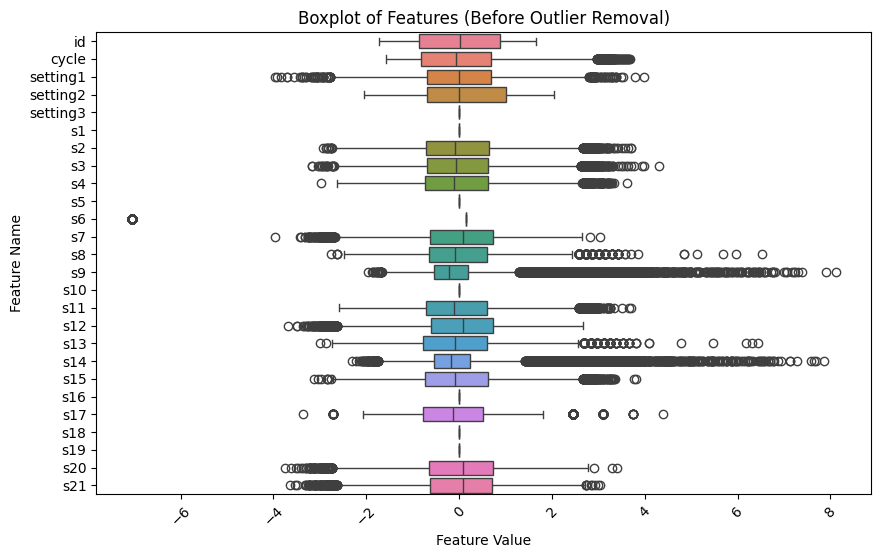

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(X_scaled), orient="h")
plt.title("Boxplot of Features (Before Outlier Removal)")
plt.xlabel("Feature Value")
plt.ylabel("Feature Name")
plt.yticks(ticks=range(len(X.columns)), labels=X.columns)  # Replace with actual feature names
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


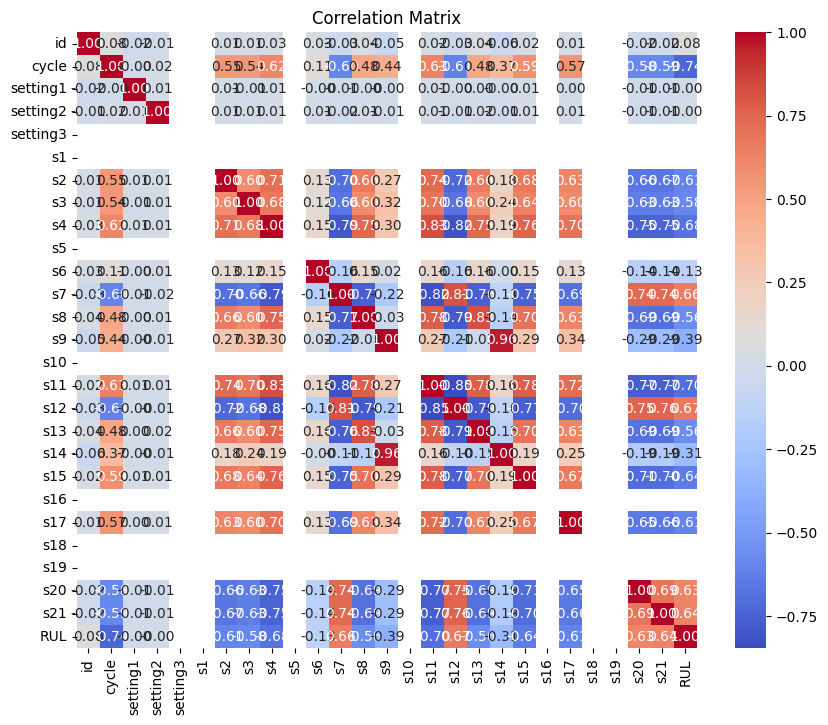

In [9]:
# Plot correlation matrix to understand feature relationships
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [10]:
# # Pairplot for pairwise relationships between features
# sns.pairplot(df_cleaned)
# plt.title("Pairplot of Features")
# plt.show()


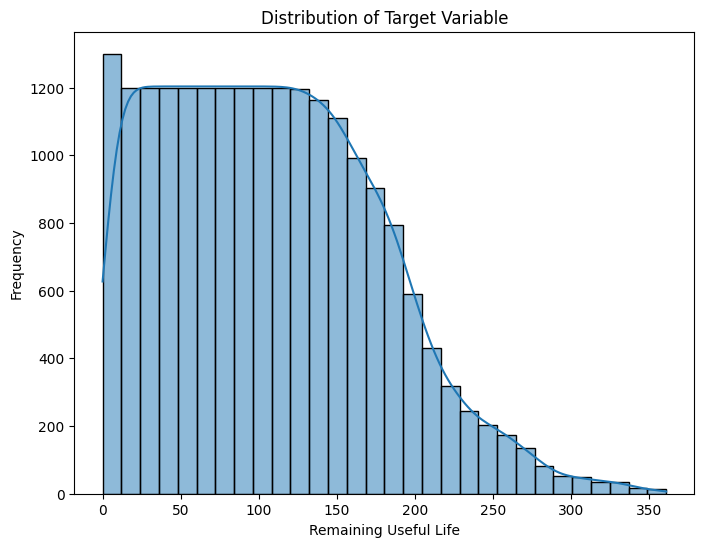

In [11]:
# Distribution plot for target variable
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, x='RUL', kde=True, bins=30)
plt.title("Distribution of Target Variable")
plt.xlabel("Remaining Useful Life")
plt.ylabel("Frequency")
plt.show()



In [20]:
# # Scatter plots of features against target variable
# # Select relevant features
# relevant_features = ['cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6',
#                      's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19',
#                      's20', 's21']

# # Define X dataframe
# X = df[relevant_features]

# fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(18, 14))  # Adjusted to 5x5 grid

# for i, col in enumerate(X.columns):
#     row = i // 5
#     col = i % 5
#     axes[row, col].scatter(X[col], y, alpha=0.5)
#     axes[row, col].set_title(f"{col} vs. RUL")
#     axes[row, col].set_xlabel(col)
#     axes[row, col].set_ylabel("Remaining Useful Life")

# plt.tight_layout()
# plt.show()



## 2. Feature Selection

#### 2.1 Select relevant features

In [24]:
relevant_features = ['cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6',
                     's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19',
                     's20', 's21', 'RUL']

# Filter the dataset to include only relevant features
df_selected_features = df[relevant_features]




#### 2.2 Feature Engineering

In [25]:

# Create time windows for aggregating sensor readings and operating conditions
# (Note: Time-window creation can be customized based on domain knowledge and requirements)
time_window_size = 10  # Define the size of the time window (e.g., 10 cycles)
time_window_data = []

for i in range(len(df_selected_features) - time_window_size + 1):
    window_data = df_selected_features.iloc[i:i + time_window_size]
    aggregated_data = window_data.mean()  # Aggregate sensor readings and settings (e.g., using mean)
    aggregated_data['RUL'] = window_data.iloc[-1]['RUL']  # Add RUL from the last cycle in the window
    time_window_data.append(aggregated_data)

# Convert the list of dictionaries to a DataFrame
df_time_windows = pd.DataFrame(time_window_data)

# Separate features (X) and target variable (y)
X = df_time_windows.drop(columns=['RUL'])
y = df_time_windows['RUL']

# 3. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Now you can use X_train, X_test, y_train, and y_test for model training and evaluation

<ipython-input-25-0032db54855a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_data['RUL'] = window_data.iloc[-1]['RUL']  # Add RUL from the last cycle in the window


## 3. Model Selection

#### 3.1Random Forests

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 712.5136558060606


#### 3.2 Gradient Boosting (e.g., XGBoost)

In [27]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Train the model
xgb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1030.2728186250224


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the logistic regression model
logistic_regression = LogisticRegression(random_state=42)

# Train the model
logistic_regression.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.011393939393939394
Classification Report:
              precision    recall  f1-score   support

         0.0       0.24      0.57      0.33        23
         1.0       0.06      0.18      0.09        17
         2.0       0.09      0.04      0.06        25
         3.0       0.06      0.05      0.05        20
         4.0       0.11      0.06      0.08        17
         5.0       0.00      0.00      0.00        23
         6.0       0.00      0.00      0.00        17
         7.0       0.03      0.08      0.04        13
         8.0       0.00      0.00      0.00        15
         9.0       0.00      0.00      0.00        24
        10.0       0.00      0.00      0.00        12
        11.0       0.03      0.05      0.04        19
        12.0       0.00      0.00      0.00        17
        13.0       0.00      0.00      0.00        24
        14.0       0.09      0.10      0.09        20
        15.0       0.00      0.00      0.00        15
        16.0       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with n

## 4. Model Training

In [29]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the XGBoost model
xgb_model = xgb.XGBRegressor()

# Define hyperparameters to tune
parameters = {'n_estimators': [50, 100, 150],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.2]}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Train the best model on the entire training dataset
best_xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 837.9830643519955


## 5. Model Evaluation

Mean Squared Error: 837.9830643519955
R-squared (R2 Score): 0.8189764705888002


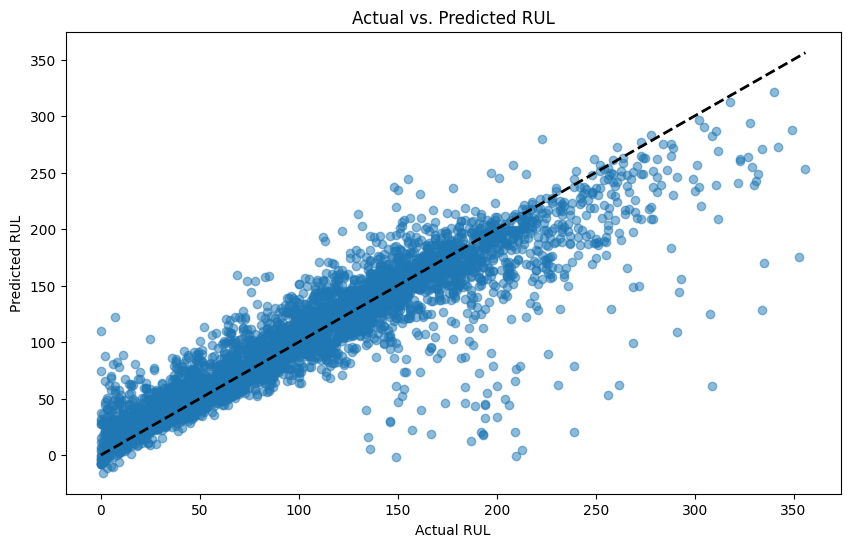

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2 Score):", r2)

# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs. Predicted RUL')
plt.show()
